### LSTM Practice Task

##### Data Preparation

In [30]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import LSTM, Dense
import matplotlib.pyplot as plt
import numpy as np

(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [19]:
# Normalize pixel values to be between 0 and 1
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [20]:
# Reshape the images to match the input shape of the LSTM model
X_train = X_train.reshape(-1, 28, 28)
X_test = X_test.reshape(-1, 28, 28)


In [21]:
# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

##### Model Defination

In [22]:
# Define the LSTM model
model = Sequential()
model.add(LSTM(units=128, input_shape=(28, 28)))
model.add(Dense(units=10, activation='softmax'))

2023-04-12 09:15:40.052216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-12 09:15:40.054565: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-12 09:15:40.056986: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

##### Model Compilation

In [23]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

##### Model Training

In [25]:
history = model.fit(X_train, y_train, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
  1/422 [..............................] - ETA: 22s - loss: 0.1609 - accuracy: 0.9297

2023-04-12 09:16:45.942723: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 169344000 exceeds 10% of free system memory.


422/422 [==============================] - 23s 54ms/step - loss: 0.1042 - accuracy: 0.9678 - val_loss: 0.0744 - val_accuracy: 0.9780
Epoch 2/10
422/422 [==============================] - 21s 49ms/step - loss: 0.0809 - accuracy: 0.9748 - val_loss: 0.0589 - val_accuracy: 0.9833
Epoch 3/10
422/422 [==============================] - 21s 49ms/step - loss: 0.0639 - accuracy: 0.9803 - val_loss: 0.0620 - val_accuracy: 0.9838
Epoch 4/10
422/422 [==============================] - 22s 52ms/step - loss: 0.0550 - accuracy: 0.9827 - val_loss: 0.0542 - val_accuracy: 0.9840
Epoch 5/10
422/422 [==============================] - 18s 43ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0479 - val_accuracy: 0.9865
Epoch 6/10
422/422 [==============================] - 17s 40ms/step - loss: 0.0394 - accuracy: 0.9879 - val_loss: 0.0504 - val_accuracy: 0.9872
Epoch 7/10
422/422 [==============================] - 17s 40ms/step - loss: 0.0370 - accuracy: 0.9887 - val_loss: 0.0464 - val_accuracy: 0.9870
Epo

##### Model Evaluation

In [27]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

313/313 [==============================] - 5s 15ms/step - loss: 0.0443 - accuracy: 0.9855
Test Loss:  0.04433527961373329
Test Accuracy:  0.9854999780654907


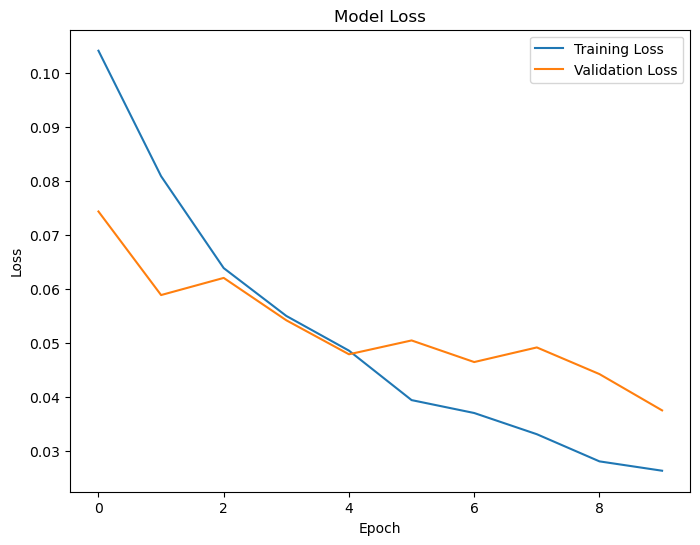

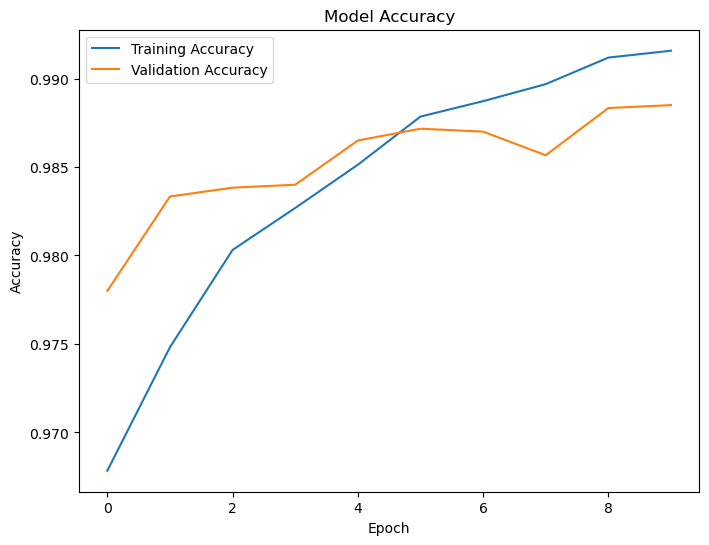

In [28]:
# Plot the training loss and accuracy
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

##### Make Predictions

In [31]:
X_pred = X_test[:5]  # First 5 samples from the testing data
y_pred = model.predict(X_pred)
predicted_labels = np.argmax(y_pred, axis=1)

2023-04-12 09:27:19.262936: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2023-04-12 09:27:19.266549: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2023-04-12 09:27:19.268546: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

1/1 [==============================] - 1s 721ms/step


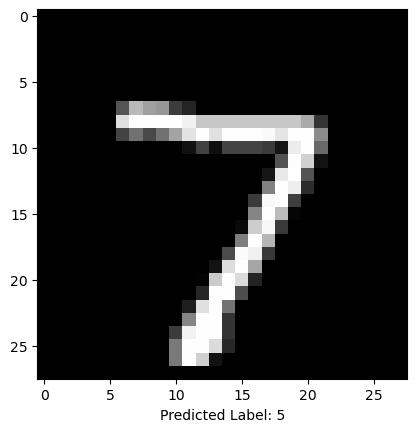

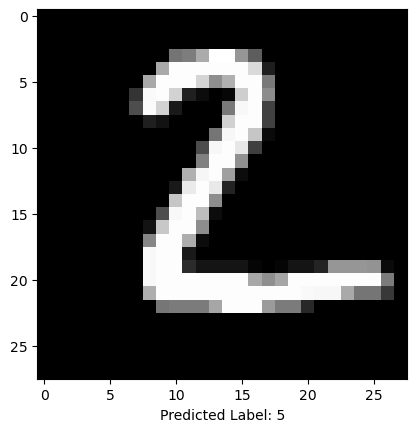

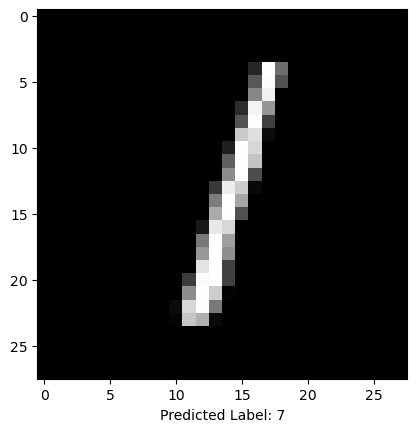

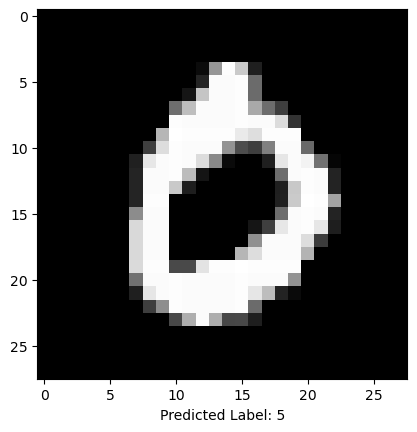

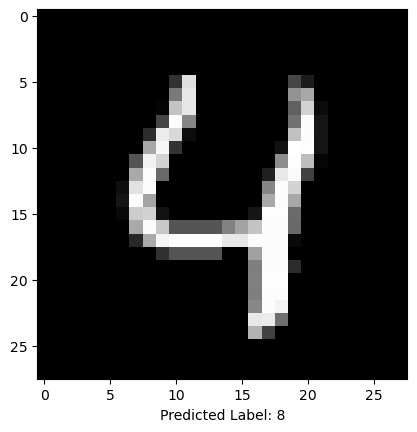

In [33]:
# Visualize the predictions
for i in range(5):
    plt.imshow(X_test[i], cmap='gray')
    plt.xlabel("Predicted Label: " + str(predicted_labels[i]))
    plt.show()